 ## **Importing Libraries**

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Data Preprocessing**

### Traing Image Preprocessing

In [24]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [25]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [26]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [27]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[180.   174.   178.  ]
   [174.25 168.25 172.25]
   [173.   167.   171.  ]
   ...
   [203.25 198.25 202.25]
   [196.75 191.75 195.75]
   [208.   203.   207.  ]]

  [[163.   157.   161.  ]
   [161.25 155.25 159.25]
   [158.75 152.75 156.75]
   ...
   [195.25 190.25 194.25]
   [200.5  195.5  199.5 ]
   [206.25 201.25 205.25]]

  [[158.   152.   156.  ]
   [166.75 160.75 164.75]
   [171.   165.   169.  ]
   ...
   [197.5  192.5  196.5 ]
   [194.75 189.75 193.75]
   [204.   199.   203.  ]]

  ...

  [[ 80.25  71.25  76.25]
   [ 91.25  82.25  87.25]
   [ 92.25  83.25  88.25]
   ...
   [137.5  130.5  138.5 ]
   [142.5  135.5  143.5 ]
   [122.   115.   123.  ]]

  [[ 84.    75.    80.  ]
   [ 84.    75.    80.  ]
   [ 87.25  78.25  83.25]
   ...
   [119.25 112.25 120.25]
   [139.5  132.5  140.5 ]
   [149.   142.   150.  ]]

  [[ 86.25  77.25  82.25]
   [ 82.25  73.25  78.25]
   [ 83.75  74.75  79.75]
   ...
   [127.   120.   128.  ]
   [125.25 118.25 126.25]
   [113.25 106.25 11

## **Building Model**

In [28]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential()

## Building Convolution Layer

In [30]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [31]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [32]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [33]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

### Flatening

In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(units=1024, activation='relu'))

In [36]:
#Output Layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

## Model Training

In [39]:
training_history = model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 157s 71ms/step - loss: 1.2117 - accuracy: 0.6413 - val_loss: 0.4937 - val_accuracy: 0.8399
Epoch 2/10
2197/2197 [==============================] - 141s 64ms/step - loss: 0.3823 - accuracy: 0.8753 - val_loss: 0.3728 - val_accuracy: 0.8825
Epoch 3/10
2197/2197 [==============================] - 155s 71ms/step - loss: 0.2571 - accuracy: 0.9143 - val_loss: 0.3126 - val_accuracy: 0.9009
Epoch 4/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.2014 - accuracy: 0.9332 - val_loss: 0.3060 - val_accuracy: 0.9084
Epoch 5/10
2197/2197 [==============================] - 154s 70ms/step - loss: 0.1726 - accuracy: 0.9427 - val_loss: 0.3640 - val_accuracy: 0.8898
Epoch 6/10
2197/2197 [==============================] - 146s 66ms/step - loss: 0.1565 - accuracy: 0.9488 - val_loss: 0.3036 - val_accuracy: 0.9130
Epoch 7/10
2197/2197 [==============================] - 152s 69ms/step - loss: 0.1501 - accuracy: 0.9508 - val_loss: 0

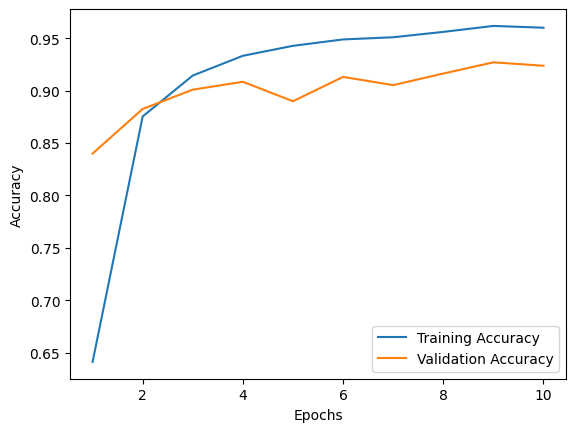

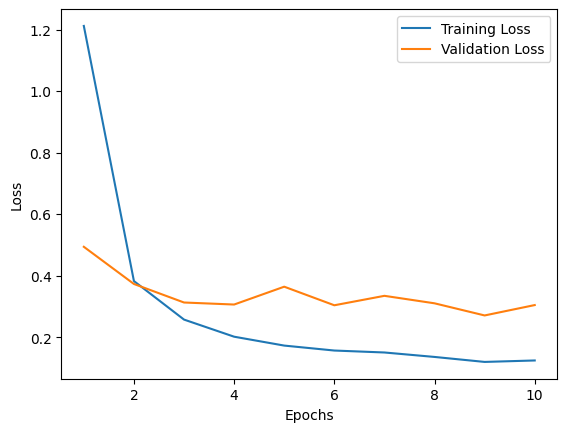

In [40]:
import matplotlib.pyplot as plt

# Extract data
history = training_history.history
epochs = range(1, 11)

# Plot Accuracy
plt.plot(epochs, history['accuracy'], label="Training Accuracy")
plt.plot(epochs, history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(epochs, history['loss'], label="Training Loss")
plt.plot(epochs, history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
